In [30]:
%reload_ext autoreload
%autoreload 2


import numpy as np
from shared.models_store import Store

In [31]:
store = Store(None, '../dist/store.json')
store.load()

import json 

names_translations = {
  "Conv1d v2": "Konwolucja 1D wariant 2",
  "Decision Tree": "Drzewo decyzyjne",
  "Gaussian Naive Bayes": "Gaussian Naive Bayes",
  "Multi-Layer Perceptron": "Perceptron wielowarstwowy",
  "SVC": "SVC",
  "Quadratic Discriminant Analysis": "Kwadratowa analiza dyskryminacyjna",
  "Logistic Regression": "Regresja logistyczna",
  "Conv1d Deep": "Konwolucja 1D wariant 3",
  "Conv1d": "Konwolucja 1D wariant 1",
  "XGBoost": "XGBoost",
  "Random Forest": "Las losowy",
}

def rename(model):
    for source, target in sorted(names_translations.items(), reverse=True):
        model['name'] = model['name'].replace(source, target)    
    return model

configuration = store.configuration
models = [rename(m) for m in configuration.values() if 'Ada Boost' not in m['name'] and 'Gradient Boosting' not in m['name']]
imdb_models = [m for m in models if m['metadata'].get('Dataset') == 'Internet Movie Database']
food_models = [m for m in models if m['metadata'].get('Dataset') == 'Amazon Fine Food Reviews']

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from pylab import rcParams
from IPython.core.display import display, HTML
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 19

def plot_roc_curve(models, phase):
    # calculate the fpr and tpr for all thresholds of the classification
    plt.title('Krzywa ROC dla {}'.format('danych treningowych' if phase == 'train' else 'danych testowych'))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Czułość')
    plt.xlabel('1 - swoistość')
    
    models = sorted(models, reverse=True, key=lambda m: metrics.auc(m[phase]['roc']['fpr'], m[phase]['roc']['tpr']))
    
    for i, model in enumerate(models):
        fpr, tpr = model[phase]['roc']['fpr'], model[phase]['roc']['tpr']
        roc_auc = '{:.3f}'.format(metrics.auc(fpr, tpr), 3)
        model['metadata']['ROCAUC'] = roc_auc
        name = model['name'].replace('Food Reviews ', '').replace('IMDB ', '')
        plt.plot(fpr, tpr, label='{} {}'.format(roc_auc, name), linewidth=3, linestyle=[None, '--', '-.'][i%3])
    
    plt.legend(loc='lower right')
    plt.show()

    
def show_accuracy_summary(models):
    cols = ['Name', 'Accuracy', 'F1-Score', 'MCC', 'ROC AUC']
    train_df = pd.DataFrame([
        {
            'Name': m['name'].replace('Food Reviews ', '').replace('IMDB ', ''), 
            **{k: v for k, v in m['train']['metrics'].items() if k in cols},
        } for m in models
    ]).sort_values('MCC', ascending=False) # .set_index('Name')
    test_df = pd.DataFrame([
        {
            'Name': m['name'].replace('Food Reviews ', '').replace('IMDB ', ''), 
            **{k: v for k, v in m['test']['metrics'].items() if k in cols},
        } for m in models
    ]).sort_values('MCC', ascending=False) # .set_index('Name')
    print('Train mean')
    print(train_df.mean())
    print('Test mean')
    print(test_df.mean())
#     display(HTML(train_df.style.background_gradient(cmap='viridis').render()))
#     display(HTML(test_df.style.background_gradient(cmap='viridis').render()))
#     display(HTML((test_df - train_df).sort_values('MCC', ascending=False).style.background_gradient(cmap='viridis').render()))
    print(train_df.to_latex(index=False, float_format="%.3f", columns=cols))
    print(test_df.to_latex(index=False, float_format="%.3f", columns=cols))
    

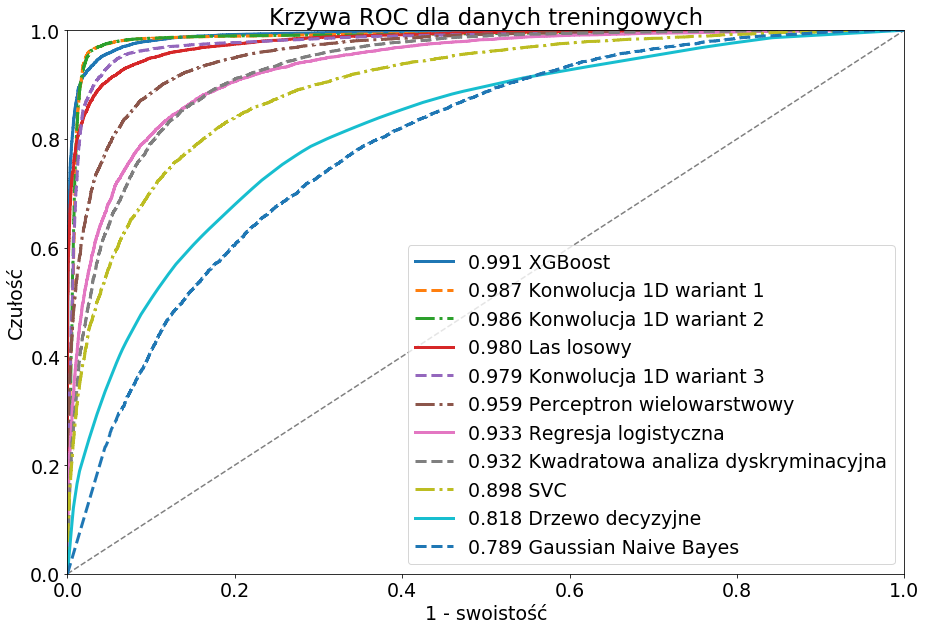

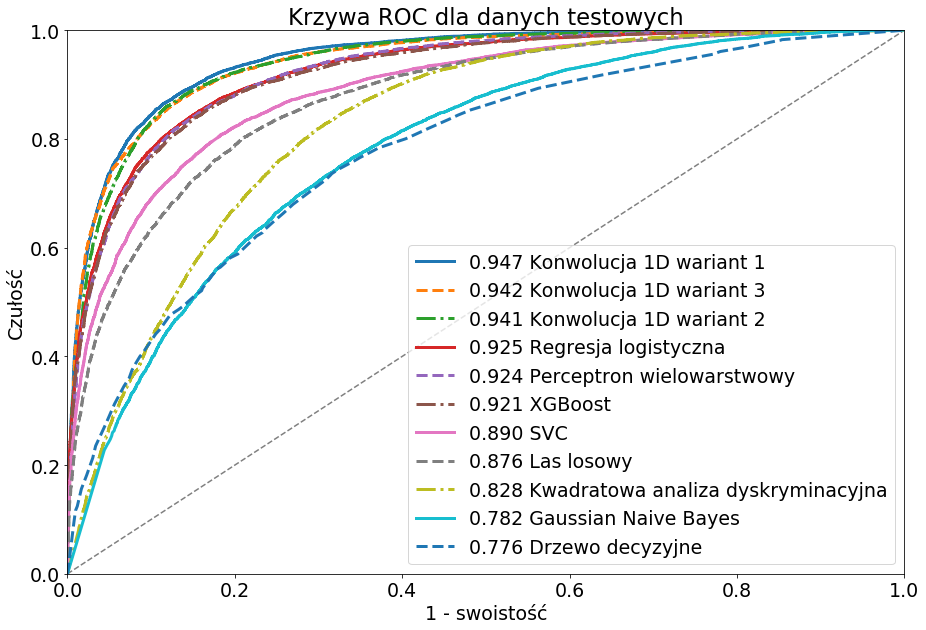

Train mean
Accuracy    0.870898
F1-Score    0.868152
MCC         0.743853
ROC AUC     0.931987
dtype: float64
Test mean
Accuracy    0.804371
F1-Score    0.800798
MCC         0.612017
ROC AUC     0.886625
dtype: float64
\begin{tabular}{lrrrr}
\toprule
                               Name &  Accuracy &  F1-Score &   MCC &  ROC AUC \\
\midrule
            Konwolucja 1D wariant 2 &     0.955 &     0.957 & 0.912 &    0.986 \\
                            XGBoost &     0.955 &     0.955 & 0.910 &    0.991 \\
            Konwolucja 1D wariant 1 &     0.950 &     0.951 & 0.901 &    0.987 \\
                         Las losowy &     0.930 &     0.929 & 0.861 &    0.980 \\
            Konwolucja 1D wariant 3 &     0.927 &     0.923 & 0.858 &    0.979 \\
          Perceptron wielowarstwowy &     0.892 &     0.895 & 0.785 &    0.959 \\
               Regresja logistyczna &     0.859 &     0.859 & 0.718 &    0.933 \\
 Kwadratowa analiza dyskryminacyjna &     0.834 &     0.818 & 0.677 &    0.932 \\
  

In [38]:
plot_roc_curve(imdb_models, 'train')
plot_roc_curve(imdb_models, 'test')
show_accuracy_summary(imdb_models)

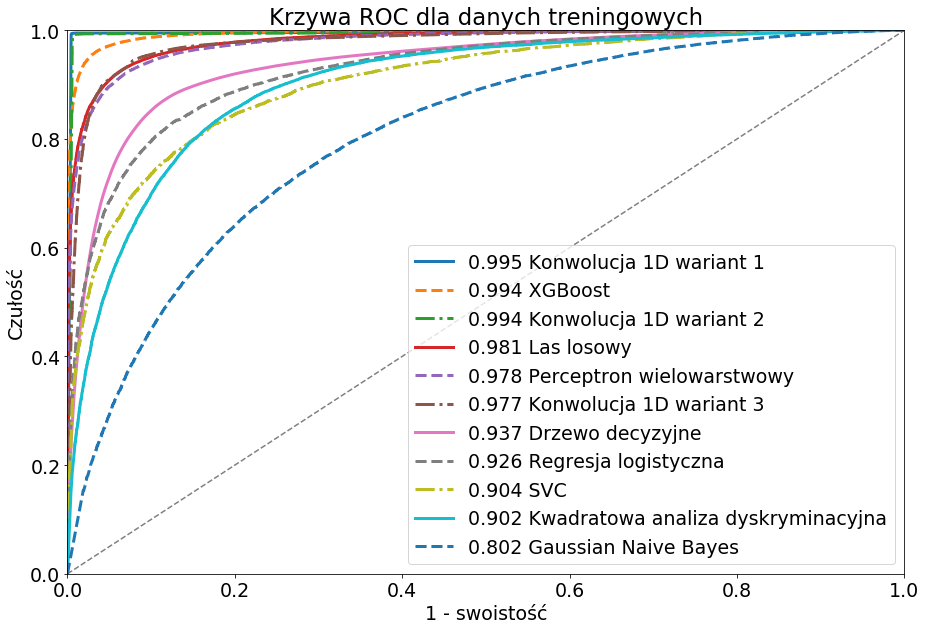

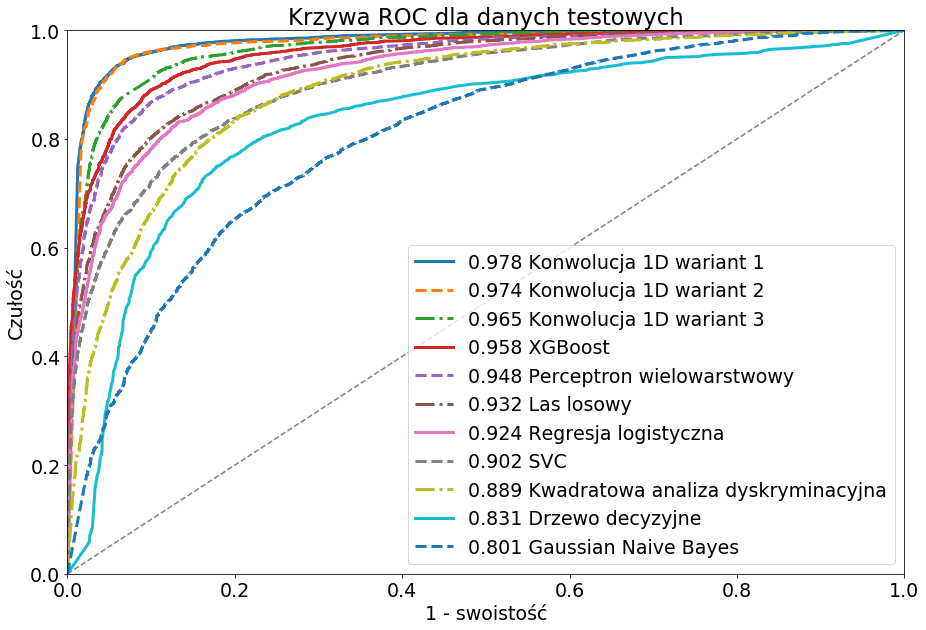

Train mean
Accuracy    0.892274
F1-Score    0.888753
MCC         0.785664
ROC AUC     0.944418
dtype: float64
Test mean
Accuracy    0.853091
F1-Score    0.850641
MCC         0.707644
ROC AUC     0.918315
dtype: float64
\begin{tabular}{lrrrr}
\toprule
                               Name &  Accuracy &  F1-Score &   MCC &  ROC AUC \\
\midrule
            Konwolucja 1D wariant 1 &     0.994 &     0.994 & 0.988 &    0.995 \\
            Konwolucja 1D wariant 2 &     0.988 &     0.988 & 0.976 &    0.994 \\
                            XGBoost &     0.963 &     0.963 & 0.926 &    0.994 \\
                         Las losowy &     0.931 &     0.930 & 0.861 &    0.981 \\
            Konwolucja 1D wariant 3 &     0.926 &     0.929 & 0.855 &    0.977 \\
          Perceptron wielowarstwowy &     0.924 &     0.923 & 0.849 &    0.978 \\
                   Drzewo decyzyjne &     0.878 &     0.877 & 0.756 &    0.937 \\
               Regresja logistyczna &     0.851 &     0.849 & 0.701 &    0.926 \\
  

In [39]:
plot_roc_curve(food_models, 'train')
plot_roc_curve(food_models, 'test')
show_accuracy_summary(food_models)